# DATA VISUALISATION

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.dates as mdates
from datetime import datetime, timedelta
from pandas.plotting import scatter_matrix

In [41]:
## Files location
path_root = r'C:/Users/jledreau/Documents/0-Git/AtlanFlex-Smart-thermostat/'
path_csv = path_root + 'newDistrict/OccupantInteract-highProb/'  # highProb - middleProb - no
good_filenames = ['deltaT0/', 'deltaT2_PeakHour_RedDays/']


## Other parameters
# Input parameters
districtSize = 337        # 337 to select all households, below otherwise

# Plot layout
xlim_def = [datetime(2015, 1, 12), datetime(2015, 1, 22)]

# Load data

In [3]:
# Second layout (multiple files)
def read_csv_oneCase(i,selected_buildings,path):
    data_noFlex_gen = pd.read_csv(path+i+"conso.csv", sep=',', index_col=0)                 # Heating need
    data_noFlex_hp = pd.read_csv(path+i+"heatPump.csv", sep=',', index_col=0)               # Heating consumption (el)
    data_noFlex_eq = pd.read_csv(path+i+"consoEquip.csv", sep=',', index_col=0)             # Equipement
    data_noFlex_tmp = pd.read_csv(path+i+"operativeTemp.csv", sep=',', index_col=0)         # Operative temperature
    data_noFlex_weather = pd.read_csv(path+i+"outdoorTemp.csv", sep=',', index_col=0)       # External conditions
    data_noFlex_spChange = pd.read_csv(path+i+"setPointChange.csv", sep=',', index_col=0)   # SP interactions
    df_Top_noFlex_oneRun = pd.DataFrame()
    df_Pheating_noFlex_oneRun=pd.DataFrame()
    df_PheatingEl_noFlex_oneRun=pd.DataFrame()
    df_Pequip_noFlex_oneRun=pd.DataFrame()
    df_spChange_noFlex_oneRun = pd.DataFrame()
    df_Toutdoor = data_noFlex_weather["La_Rochelle"]
    for j in selected_buildings:
        df_Top_noFlex_oneRun[j] = data_noFlex_tmp[j]
        df_Pheating_noFlex_oneRun[j] = data_noFlex_gen["my_generator_" + j]
        df_PheatingEl_noFlex_oneRun[j] = data_noFlex_hp["my_generator_" + j]
        df_Pequip_noFlex_oneRun[j] = data_noFlex_eq["my_equipment_" + j + '_Dw1']
        df_spChange_noFlex_oneRun[j] = data_noFlex_spChange[j]
    df2dt(df_Top_noFlex_oneRun)
    df2dt(df_Pheating_noFlex_oneRun)
    df2dt(df_PheatingEl_noFlex_oneRun)
    df2dt(df_Pequip_noFlex_oneRun)
    df_spChange_noFlex_oneRun=df2dt(df_spChange_noFlex_oneRun)
    df2dt(df_Toutdoor)
    return [df_Top_noFlex_oneRun, 
            df_Pheating_noFlex_oneRun, 
            df_PheatingEl_noFlex_oneRun,
            df_Pequip_noFlex_oneRun, 
            df_spChange_noFlex_oneRun,
            df_Toutdoor]

def df2dt(df):
    df.index = pd.to_datetime(df.index)
    #df.tz_localize('UTC') # 'CET') -> error NonExistentTimeError: 2015-03-29 02:00:00
    return df

In [4]:
# Select the buildings to study (based on districtSize)
if len(good_filenames)>0:
    data_noFlex = pd.read_csv(path_csv + good_filenames[0] + "conso.csv", sep=',', index_col=0)
    selected_buildings = [name.split("_")[2]+"_"+name.split("_")[3] for name in data_noFlex.columns if name.startswith("my_generator_")]
    selected_buildings = np.random.choice(selected_buildings, districtSize, replace=False)
    
# Extract data (noFlex)
[df0_Top_noFlex_oneRun, 
df0_Pheating_noFlex_oneRun, 
df0_PheatingEl_noFlex_oneRun,
df0_Pequip_noFlex_oneRun, 
df0_spChange_noFlex_oneRun,
df_Toutdoor] = df_X0= read_csv_oneCase(good_filenames[0], selected_buildings,path_csv)

# Extract data (flex)
[df0_Top_flex_oneRun, 
df0_Pheating_flex_oneRun,
df0_PheatingEl_flex_oneRun,
df0_Pequip_flex_oneRun, 
df0_spChange_flex_oneRun, 
df_Toutdoor] = df_X0= read_csv_oneCase(good_filenames[1], selected_buildings,path_csv)

# Basic verifications and plots

In [42]:
# COP check
(df0_Pheating_flex_oneRun/df0_PheatingEl_flex_oneRun).head(5)

Building32_TZ1  Building88_TZ1  Building46_TZ2  \
2015-01-01 00:00:00+01:00        2.394242        2.394242             NaN   
2015-01-01 00:10:00+01:00        2.394242        2.394242             NaN   
2015-01-01 00:20:00+01:00        2.394242        2.394242             NaN   
2015-01-01 00:30:00+01:00        2.394242        2.394242             NaN   
2015-01-01 00:40:00+01:00        2.394242        2.394242             NaN   

                           Building33_TZ1  Building22_TZ0  Building79_TZ2  \
2015-01-01 00:00:00+01:00             NaN             NaN             NaN   
2015-01-01 00:10:00+01:00             NaN             NaN        2.394242   
2015-01-01 00:20:00+01:00             NaN             NaN        2.394242   
2015-01-01 00:30:00+01:00             NaN        2.394242        2.394242   
2015-01-01 00:40:00+01:00        2.394242        2.394242        2.394242   

                           Building46_TZ1  Building85_TZ2  Building45_TZ3  \
2015-01-01 00:00:00+01:00             NaN             NaN        2.394242   
2015-01-01 00:10:00+01:00             NaN             NaN        2.394242   
2015-01-01 00:20:00+01:00             NaN             NaN        2.394242   
2015-01-01 00:30:00+01:00             NaN             NaN        2.394242   
2015-01-01 00:40:00+01:00             NaN             NaN        2.394242   

                           Building5_TZ0  ...  Building2_TZ0  Building49_TZ2  \
2015-01-01 00:00:00+01:00       2.394242  ...       2.394242             NaN   
2015-01-01 00:10:00+01:00       2.394242  ...       2.394242        2.394242   
2015-01-01 00:20:00+01:00       2.394242  ...       2.394242        2.394242   
2015-01-01 00:30:00+01:00       2.394242  ...       2.394242        2.394242   
2015-01-01 00:40:00+01:00       2.394242  ...       2.394242        2.394242   

                           Building50_TZ3  Building37_TZ2  Building51_TZ3  \
2015-01-01 00:00:00+01:00        2.394242             NaN             NaN   
2015-01-01 00:10:00+01:00        2.394242             NaN        2.394242   
2015-01-01 00:20:00+01:00        2.394242             NaN        2.394242   
2015-01-01 00:30:00+01:00        2.394242             NaN        2.394242   
2015-01-01 00:40:00+01:00        2.394242        2.394242        2.394242   

                           Building11_TZ1  Building44_TZ1  Building0_TZ1  \
2015-01-01 00:00:00+01:00             NaN             NaN       2.394242   
2015-01-01 00:10:00+01:00             NaN        2.394242       2.394242   
2015-01-01 00:20:00+01:00             NaN        2.394242       2.394242   
2015-01-01 00:30:00+01:00             NaN        2.394242       2.394242   
2015-01-01 00:40:00+01:00        2.394242        2.394242       2.394242   

                           Building75_TZ2  Building94_TZ1  
2015-01-01 00:00:00+01:00        2.394242             NaN  
2015-01-01 00:10:00+01:00        2.394242             NaN  
2015-01-01 00:20:00+01:00        2.394242        2.394242  
2015-01-01 00:30:00+01:00        2.394242        2.394242  
2015-01-01 00:40:00+01:00        2.394242        2.394242  

[5 rows x 337 columns]

In [43]:
# Yearly COP
np.mean((df0_Pheating_flex_oneRun).mean(axis=1)/(df0_PheatingEl_flex_oneRun).mean(axis=1))

3.059419144337291

In [44]:
# Total consumption (in kWh)
np.sum((df0_Pheating_noFlex_oneRun).sum(axis=1))/1000/6

922333.6930791372

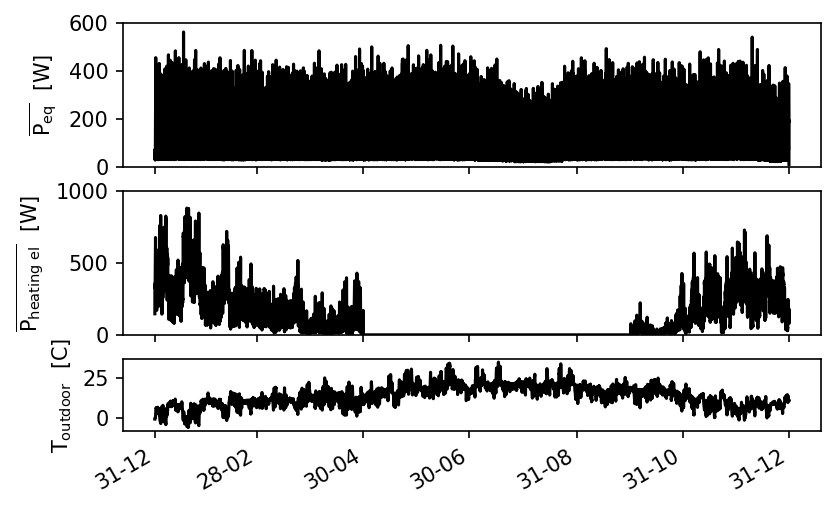

In [45]:
# P_heating
f, (ax1,ax2,ax3) = plt.subplots(3, 1, sharex=True, dpi=150)
gs = gridspec.GridSpec(3, 1,height_ratios=[2,2,1])
ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1])
ax3 = plt.subplot(gs[2])

(df0_Pequip_noFlex_oneRun).mean(axis=1).plot(ax=ax1, linestyle='-', color='k', label='w/o flex')
ax1.set_ylabel("$\mathregular{\overline{P_{eq}}\ \ [W]}$")
ax1.set_ylim(0,600)
ax1.get_xaxis().set_ticklabels([])

(df0_PheatingEl_noFlex_oneRun).mean(axis=1).plot(ax=ax2, linestyle='-', color='k', label='w/o flex')
ax2.set_ylabel("$\mathregular{\overline{P_{heating\ el}}\ \ [W]}$")
ax2.set_ylim(0,1000)
ax2.get_xaxis().set_ticklabels([])

df_Toutdoor.dropna().plot(ax=ax3, linestyle='-', color='k', label='default')
ax3.set_ylabel("$\mathregular{T_{outdoor}\ \ [C]}$")
myFmt = mdates.DateFormatter('%d-%m')
ax3.xaxis.set_major_formatter(myFmt)
#ax3.get_xaxis().set_ticklabels([])

plt.show()

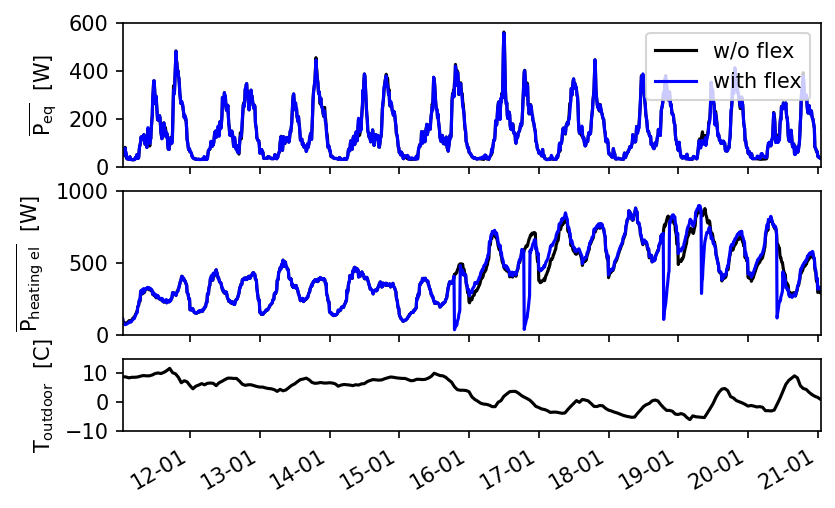

In [46]:
# P_heating
f, (ax1,ax2,ax3) = plt.subplots(3, 1, sharex=True, dpi=150)
gs = gridspec.GridSpec(3, 1,height_ratios=[2,2,1])
ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1])
ax3 = plt.subplot(gs[2])

(df0_Pequip_noFlex_oneRun).mean(axis=1).plot(ax=ax1, linestyle='-', color='k', label='w/o flex')
(df0_Pequip_flex_oneRun).mean(axis=1).plot(ax=ax1, linestyle='-', color='b', label='with flex')
ax1.set_ylabel("$\mathregular{\overline{P_{eq}}\ \ [W]}$")
ax1.set_ylim(0,600)
ax1.set(xlim=xlim_def)
ax1.legend(loc=1, prop={'size': 10})
ax1.get_xaxis().set_ticklabels([])

(df0_PheatingEl_noFlex_oneRun).mean(axis=1).plot(ax=ax2, linestyle='-', color='k', label='w/o flex')
(df0_PheatingEl_flex_oneRun).mean(axis=1).plot(ax=ax2, linestyle='-', color='b', label='with flex')
ax2.set_ylabel("$\mathregular{\overline{P_{heating\ el}}\ \ [W]}$")
ax2.set_ylim(0,1000)
ax2.set(xlim=xlim_def)
ax2.get_xaxis().set_ticklabels([])

df_Toutdoor.dropna().plot(ax=ax3, linestyle='-', color='k', label='default')
ax3.set_ylabel("$\mathregular{T_{outdoor}\ \ [C]}$")
ax3.set(xlim=xlim_def)
ax3.set_ylim(-10,15)
ax3.xaxis.set_major_formatter(myFmt)
#ax3.get_xaxis().set_ticklabels([])

plt.show()

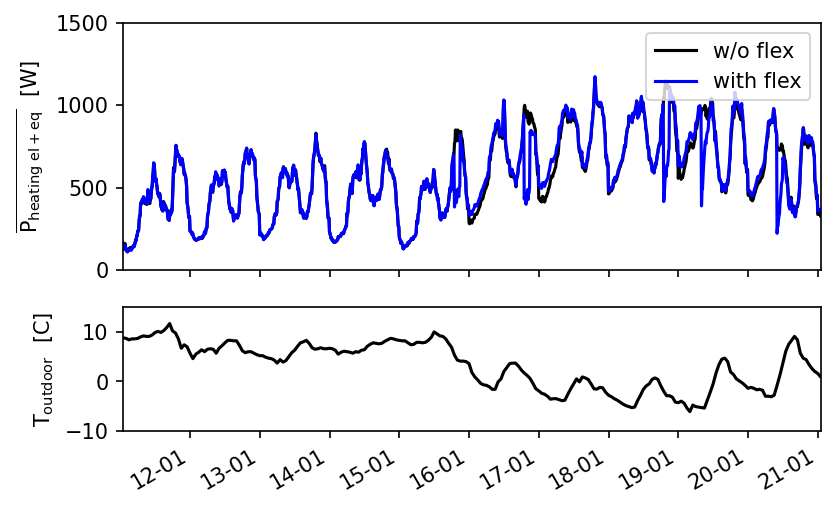

In [47]:
# P_el tot
f, (ax1,ax2) = plt.subplots(2, 1, sharex=True, dpi=150)
# f.suptitle('SA analysis (run ' + '0' + " , with " + str(districtSize) + " thermal zones/dwellings)")
# plt.tight_layout()
gs = gridspec.GridSpec(2, 1,height_ratios=[2,1])
ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1])

(df0_Pequip_noFlex_oneRun+df0_PheatingEl_noFlex_oneRun).mean(axis=1).plot(ax=ax1, linestyle='-', color='k', label='w/o flex')
(df0_Pequip_flex_oneRun+df0_PheatingEl_flex_oneRun).mean(axis=1).plot(ax=ax1, linestyle='-', color='b', label='with flex')
ax1.set_ylabel("$\mathregular{\overline{P_{heating\ el+eq}}\ \ [W]}$")
ax1.set_ylim(0,1500)
ax1.set(xlim=xlim_def)
ax1.legend(loc=1, prop={'size': 10})
ax1.get_xaxis().set_ticklabels([])

df_Toutdoor.dropna().plot(ax=ax2, linestyle='-', color='k', label='default')
ax2.set_ylabel("$\mathregular{T_{outdoor}\ \ [C]}$")
ax2.set(xlim=xlim_def)
ax2.get_xaxis().set_ticklabels([])
ax2.set_ylim(-10,15)
ax2.xaxis.set_major_formatter(myFmt)
#ax2.get_xaxis().set_ticklabels([])

plt.show()

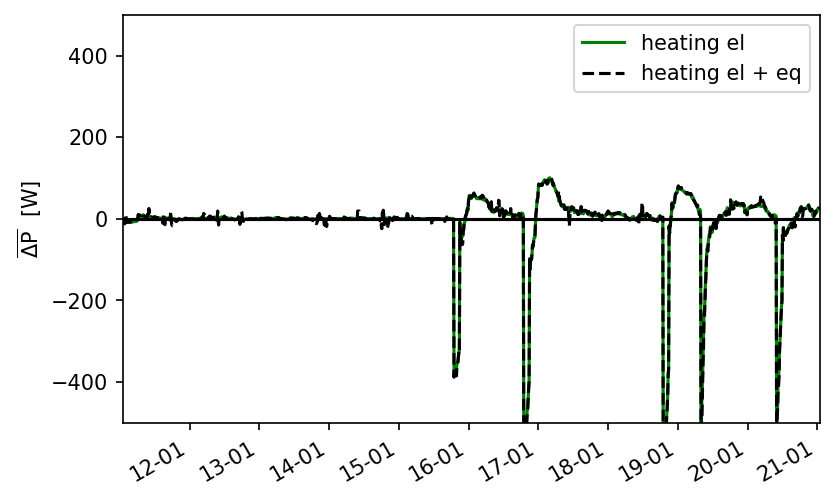

In [48]:
# Delta P_heating
f, (ax1) = plt.subplots(1, 1, sharex=True, dpi=150)
gs = gridspec.GridSpec(1, 1,height_ratios=[1])
ax1 = plt.subplot(gs[0])

dP=(df0_PheatingEl_flex_oneRun-df0_PheatingEl_noFlex_oneRun).mean(axis=1)
dP.plot(ax=ax1, linestyle='-', color='g', label='heating el')
dP=(df0_PheatingEl_flex_oneRun+df0_Pequip_flex_oneRun-df0_PheatingEl_noFlex_oneRun-df0_Pequip_noFlex_oneRun).mean(axis=1)
dP.plot(ax=ax1, linestyle='--', color='k', label='heating el + eq')
plt.plot([0,1E10],[0,0], color='k')
ax1.set_ylabel("$\mathregular{\overline{\Delta P_{}}\ \ [W]}$")
ax1.set_ylim(-500,500)
ax1.set(xlim=xlim_def)
ax1.legend(loc=1, prop={'size': 10})
ax1.xaxis.set_major_formatter(myFmt)
#ax1.get_xaxis().set_ticklabels([])


plt.show()

# Occupant interraction with thermostat

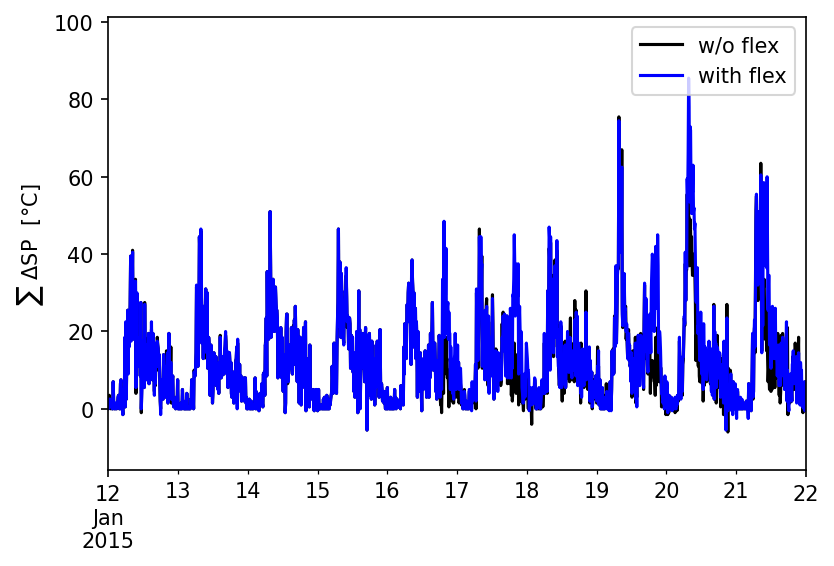

In [49]:
# SP changes (sum of dT over dwellings)
f, (ax1) = plt.subplots(1, 1, sharex=True, dpi=150)
gs = gridspec.GridSpec(1, 1,height_ratios=[1])
ax1 = plt.subplot(gs[0])

df0_spChange_noFlex_oneRun.sum(axis=1).plot(ax=ax1, linestyle='-', color='k', label='w/o flex')
df0_spChange_flex_oneRun.sum(axis=1).plot(ax=ax1, linestyle='-', color='b', label='with flex')
ax1.set_ylabel("$\mathregular{\sum{\ \Delta SP_{}}\ \ [°C]}$")
ax1.set(xlim=xlim_def)
ax1.legend(loc=1, prop={'size': 10})
#ax1.xaxis.set_major_formatter(myFmt)
#ax1.get_xaxis().set_ticklabels([])

plt.show()

In [50]:
df0_spChange_noFlex_oneRun.head(50)

Building32_TZ1  Building88_TZ1  Building46_TZ2  \
2014-12-31 23:00:00+00:00             0.0             0.0             0.0   
2014-12-31 23:10:00+00:00             0.0             0.0             0.0   
2014-12-31 23:20:00+00:00             0.0             0.0             0.0   
2014-12-31 23:30:00+00:00             0.0             0.0             0.0   
2014-12-31 23:40:00+00:00             0.0             0.0             0.0   
2014-12-31 23:50:00+00:00             0.0             0.0             0.0   
2015-01-01 00:00:00+00:00             0.0             0.0             0.0   
2015-01-01 00:10:00+00:00             0.0             0.0             0.0   
2015-01-01 00:20:00+00:00             0.0             0.0             0.0   
2015-01-01 00:30:00+00:00             0.0             0.0             0.0   
2015-01-01 00:40:00+00:00             0.0             0.0             0.0   
2015-01-01 00:50:00+00:00             0.0             0.0             0.0   
2015-01-01 01:00:00+00:00             0.0             0.0             0.0   
2015-01-01 01:10:00+00:00             0.0             0.0             0.0   
2015-01-01 01:20:00+00:00             0.0             0.0             0.0   
2015-01-01 01:30:00+00:00             0.0             0.0             0.0   
2015-01-01 01:40:00+00:00             0.0             0.0             0.0   
2015-01-01 01:50:00+00:00             0.0             0.0             0.0   
2015-01-01 02:00:00+00:00             0.0             0.0             2.0   
2015-01-01 02:10:00+00:00             0.0             0.0             0.0   
2015-01-01 02:20:00+00:00             0.0             0.0             0.0   
2015-01-01 02:30:00+00:00             0.0             0.0             0.0   
2015-01-01 02:40:00+00:00             0.0             0.0             0.0   
2015-01-01 02:50:00+00:00             0.0             0.0             0.0   
2015-01-01 03:00:00+00:00             0.0             0.0             0.0   
2015-01-01 03:10:00+00:00             0.0             0.0             0.0   
2015-01-01 03:20:00+00:00             0.0             0.0             0.0   
2015-01-01 03:30:00+00:00             0.0             0.0             0.0   
2015-01-01 03:40:00+00:00             0.0             0.0             2.0   
2015-01-01 03:50:00+00:00             0.0             0.0             0.0   
2015-01-01 04:00:00+00:00             0.0             0.0             0.0   
2015-01-01 04:10:00+00:00             0.0             0.0             0.0   
2015-01-01 04:20:00+00:00             0.0             0.0             0.0   
2015-01-01 04:30:00+00:00             0.0             0.0             0.5   
2015-01-01 04:40:00+00:00             0.0             0.0             0.0   
2015-01-01 04:50:00+00:00             0.0             0.0             0.0   
2015-01-01 05:00:00+00:00             0.0             0.0             0.0   
2015-01-01 05:10:00+00:00             0.0             0.0             0.0   
2015-01-01 05:20:00+00:00             0.0             0.0             0.0   
2015-01-01 05:30:00+00:00             0.0             0.0             0.0   
2015-01-01 05:40:00+00:00             0.0             0.0             0.0   
2015-01-01 05:50:00+00:00             0.0             0.0             0.0   
2015-01-01 06:00:00+00:00             0.0             0.0             0.0   
2015-01-01 06:10:00+00:00             0.0             0.0             0.0   
2015-01-01 06:20:00+00:00             0.0             0.0             0.0   
2015-01-01 06:30:00+00:00             0.0             0.0             0.0   
2015-01-01 06:40:00+00:00             0.0             0.0             0.0   
2015-01-01 06:50:00+00:00             0.0             0.0             0.0   
2015-01-01 07:00:00+00:00             0.0             0.0             0.0   
2015-01-01 07:10:00+00:00             0.0             0.0             0.0   

                           Building33_TZ1  Building22_TZ0  Building79_TZ2  \
2014-12-31 23:00:00+00

In [51]:
# EPct of dwellings rejecting within 3 hours time period
df0_spChange_noFlex_oneRun.index = pd.to_datetime(df0_spChange_noFlex_oneRun.index, utc=True)
df_pctSpChange_noFlex = df0_spChange_noFlex_oneRun.resample('3H').sum()
df_pctSpChange_noFlex = df_pctSpChange_noFlex>0
df_pctSpChange_noFlex = df_pctSpChange_noFlex.sum(axis=1)/districtSize

df0_spChange_flex_oneRun.index = pd.to_datetime(df0_spChange_flex_oneRun.index, utc=True)
df_pctSpChange_flex = df0_spChange_flex_oneRun.resample('3H').sum()
df_pctSpChange_flex = df_pctSpChange_flex>0
df_pctSpChange_flex = df_pctSpChange_flex.sum(axis=1)/districtSize

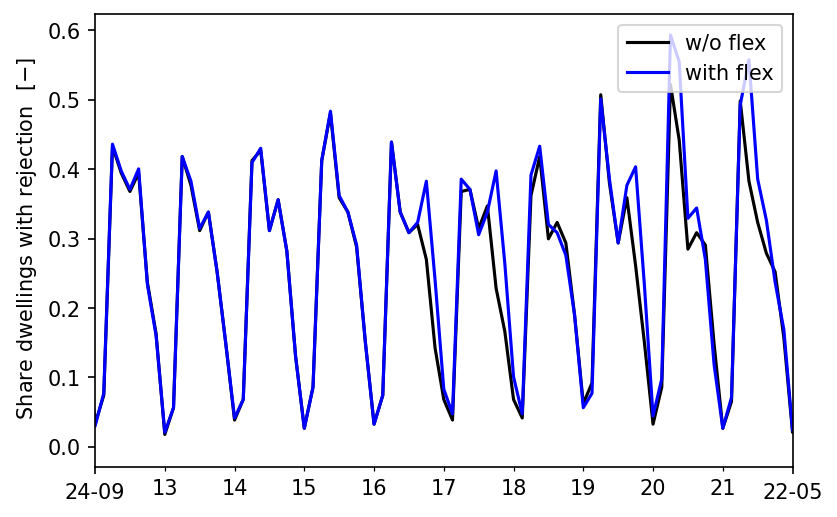

In [52]:
f, (ax1) = plt.subplots(1, 1, sharex=True, dpi=150)
gs = gridspec.GridSpec(1, 1,height_ratios=[1])
ax1 = plt.subplot(gs[0])

df_pctSpChange_noFlex.plot(ax=ax1, linestyle='-', color='k', label='w/o flex')
df_pctSpChange_flex.plot(ax=ax1, linestyle='-', color='b', label='with flex')
ax1.set_ylabel("$\mathregular{\\ Share\ dwellings\ with\ rejection_{}\ \ [-]}$")
ax1.set(xlim=xlim_def)
ax1.legend(loc=1, prop={'size': 10})
ax1.xaxis.set_major_formatter(myFmt)
#ax1.get_xaxis().set_ticklabels([])

plt.show()